### Predict biomass from extracted HLS indices/bands using a saved model

#### Load required packages

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.hls_funcs.predict import pred_bm, pred_bm_se, pred_cov
from src.models.load import load_model

#### Define inputs and load models

In [8]:
# path to the input file
inPATH = 'outputs/example_TB_wtgn_vor_idxs.csv'

# load the biomass model
mod_bm = load_model('cper_biomass')

#### Load the data

In [ ]:
df_extracted = pd.read_csv(inPATH)

#### Prepare the input data 
(NOTE: this will not be needed if you already have the biomass for the input file. 
In this case, we use an old saved model to predict biomass from VOR to get our ground estimate of biomass)

In [27]:
import pickle
# load the saved model
with open('../models/vor_linreg_both.pk', 'rb') as f:
    mod_vor = pickle.load(f)
# compute biomass from VOR. Note the multiply by 10 step to go from g/m2 to kg/ha
df_extracted['bm_obs_kg_ha'] = mod_vor.predict(df_extracted) * 10

#### Predict biomass

In [21]:
# apply the saved CPER biomass model to the dataframe. Note the exponentiate step since the CPER model predicts log-transformed biomass
df_extracted['bm_pred'] = np.exp(mod_bm.predict(df_extracted))

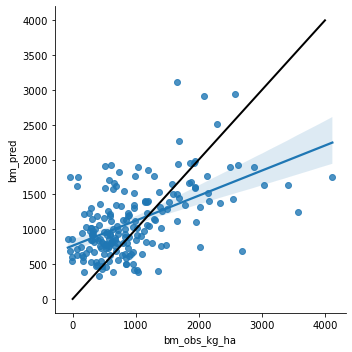

In [28]:
# plot the results showing the fitted line (blue) and the one-to-one line (black)
sns.lmplot(x='bm_obs_kg_ha', y='bm_pred', data=df_extracted, order=1, scatter=True)
plt.plot([0, 4000], [0, 4000], linewidth=2, c='black', linestyle='solid')